<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-15 17:18:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  52.1MB/s    in 3.8s    

2025-06-15 17:18:14 (52.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


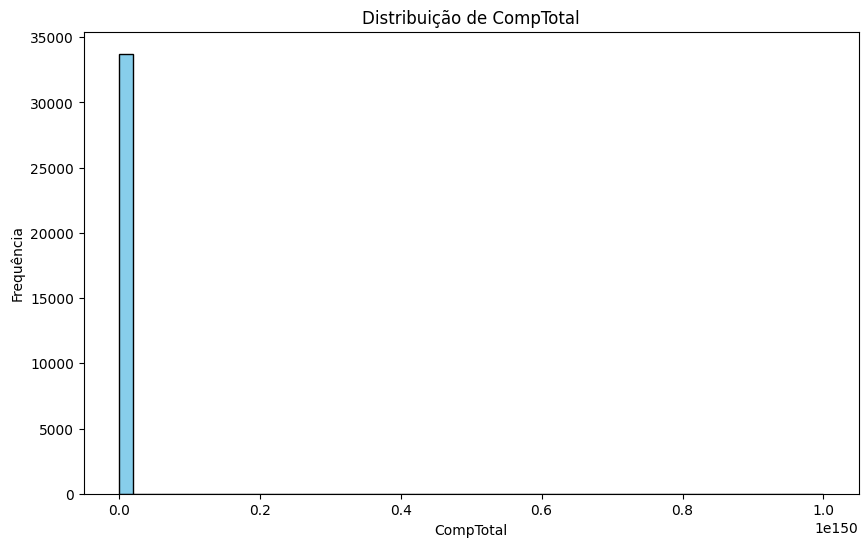

In [9]:
query = """
SELECT CAST(CompTotal AS FLOAT) AS CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição de CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequência')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


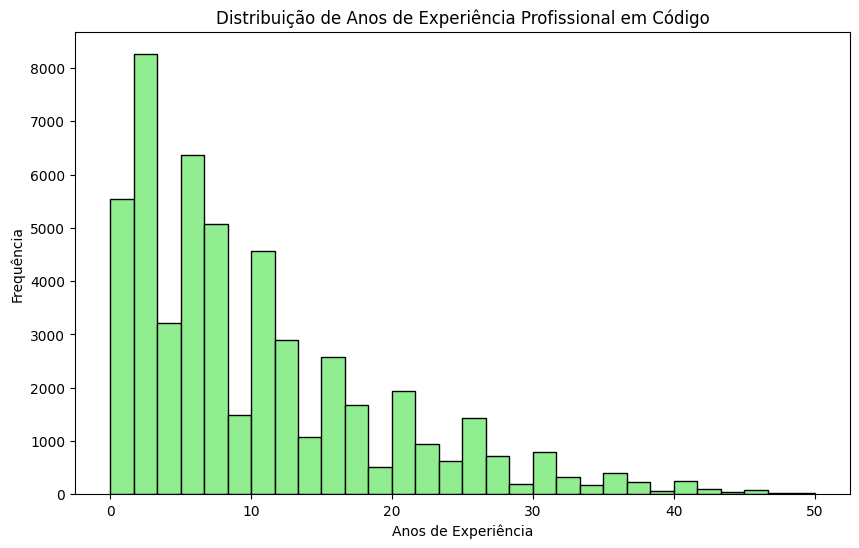

In [10]:
query = """
SELECT CAST(YearsCodePro AS FLOAT) AS YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.hist(df['YearsCodePro'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribuição de Anos de Experiência Profissional em Código')
plt.xlabel('Anos de Experiência')
plt.ylabel('Frequência')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


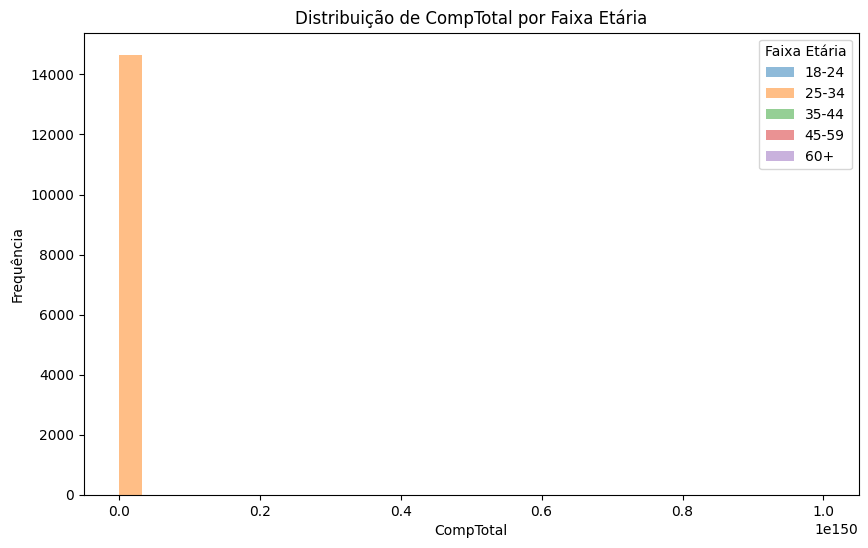

In [12]:
query = """
SELECT CAST(CompTotal AS FLOAT) AS CompTotal,
       CAST(Age AS INT) AS Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Criar faixas de idade
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
for label in labels:
    subset = df[df['AgeGroup'] == label]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=label)

plt.title('Distribuição de CompTotal por Faixa Etária')
plt.xlabel('CompTotal')
plt.ylabel('Frequência')
plt.legend(title='Faixa Etária')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


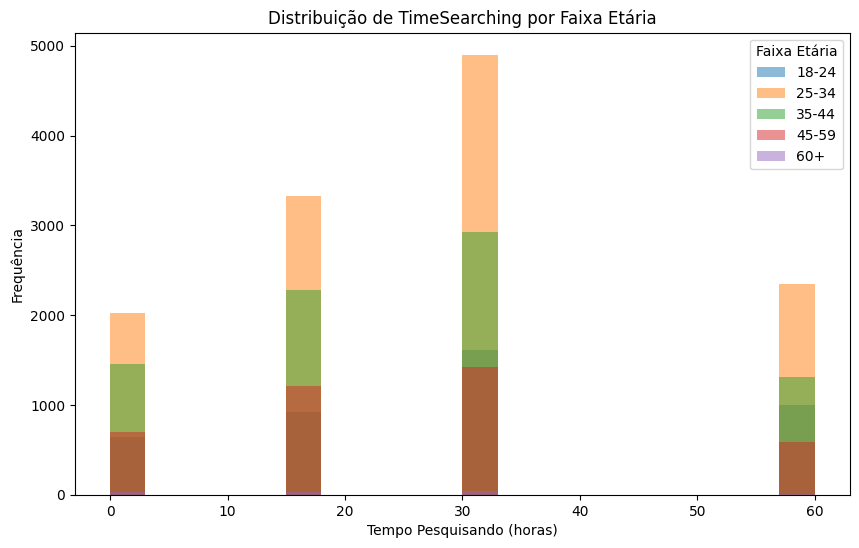

In [13]:
query = """
SELECT CAST(TimeSearching AS FLOAT) AS TimeSearching,
       CAST(Age AS INT) AS Age
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Criar faixas de idade
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
for label in labels:
    subset = df[df['AgeGroup'] == label]
    plt.hist(subset['TimeSearching'], bins=20, alpha=0.5, label=label)

plt.title('Distribuição de TimeSearching por Faixa Etária')
plt.xlabel('Tempo Pesquisando (horas)')
plt.ylabel('Frequência')
plt.legend(title='Faixa Etária')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


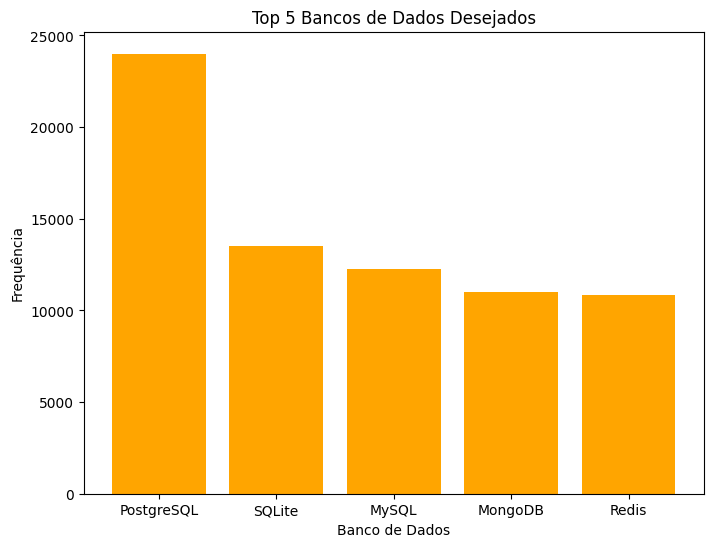

In [14]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Separar os bancos múltiplos por ;
db_list = df['DatabaseWantToWorkWith'].str.split(';').explode()

top5 = db_list.value_counts().nlargest(5)

plt.figure(figsize=(8,6))
plt.bar(top5.index, top5.values, color='orange')
plt.title('Top 5 Bancos de Dados Desejados')
plt.xlabel('Banco de Dados')
plt.ylabel('Frequência')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


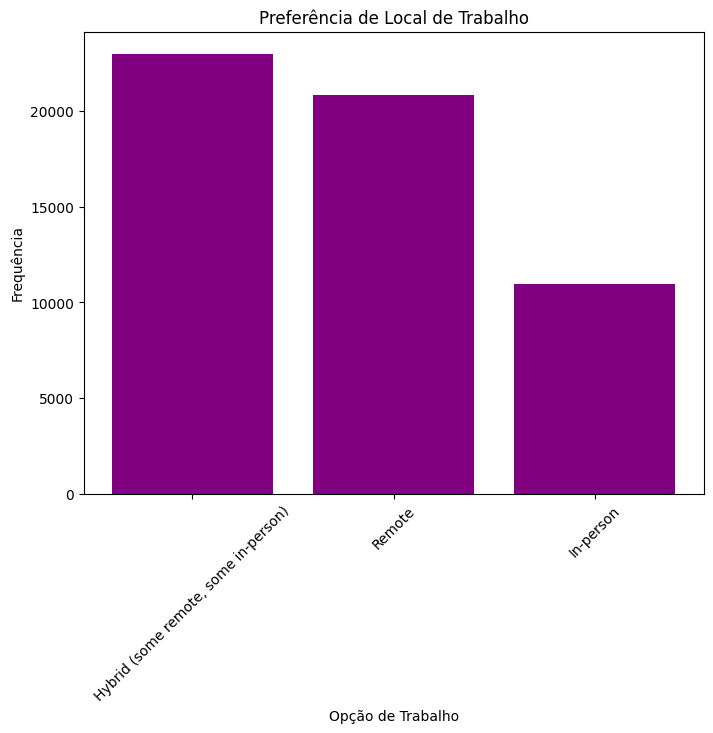

In [15]:
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values, color='purple')
plt.title('Preferência de Local de Trabalho')
plt.xlabel('Opção de Trabalho')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


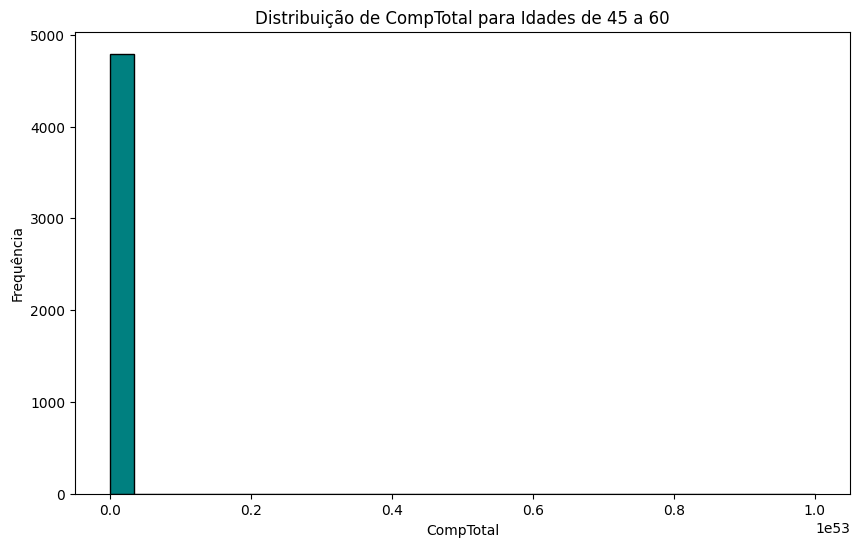

In [16]:
query = """
SELECT CAST(CompTotal AS FLOAT) AS CompTotal,
       CAST(Age AS INT) AS Age
FROM main
WHERE CompTotal IS NOT NULL 
  AND Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=30, color='teal', edgecolor='black')
plt.title('Distribuição de CompTotal para Idades de 45 a 60')
plt.xlabel('CompTotal')
plt.ylabel('Frequência')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


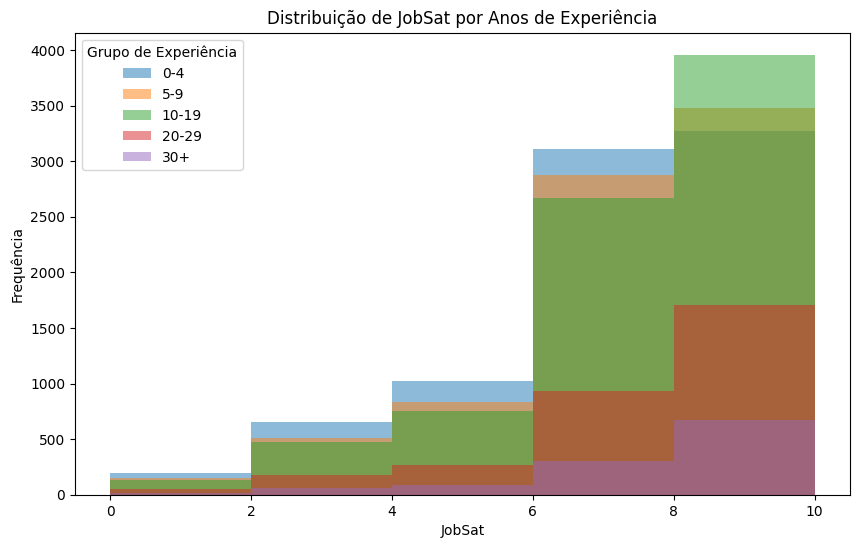

In [17]:
query = """
SELECT CAST(YearsCodePro AS INT) AS YearsCodePro,
       JobSat
FROM main
WHERE YearsCodePro IS NOT NULL 
  AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))

# Loop para cada faixa de anos de experiência
bins = [0, 5, 10, 20, 30, 50]
labels = ['0-4', '5-9', '10-19', '20-29', '30+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

for label in labels:
    subset = df[df['ExperienceGroup'] == label]
    plt.hist(subset['JobSat'], bins=5, alpha=0.5, label=label)

plt.title('Distribuição de JobSat por Anos de Experiência')
plt.xlabel('JobSat')
plt.ylabel('Frequência')
plt.legend(title='Grupo de Experiência')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [18]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
